**Downloading Dataset**

In [512]:
# !kaggle competitions download -c titanic

In [513]:
# !mkdir -p kaggle/input/titanic_data
# !unzip titanic.zip -d kaggle/input/titanic_data

# Importing the dataset and exploring basic info

In [514]:
import pandas as pd

data = pd.read_csv("/content/kaggle/input/titanic_data/train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [515]:
print("Shape of dataset")
data.shape

Shape of dataset


(891, 12)

In [516]:
print("NaN Values")
data.isnull().sum()

NaN Values


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [517]:
print("Table for NaN dataset")
data.isnull()

Table for NaN dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [518]:
data_null= data[data.isnull().any(axis=1)]
data_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [519]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# Handling NaN Values

In [520]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [521]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [522]:
#Replacing Non-numerical NaN (object - datatype) values with 'unknown'
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data[col] = data[col].fillna("Unknown")


In [523]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Encoding

In [524]:
# Extracting titles from names
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,Mr
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Unknown,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,Unknown,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,Unknown,C,Mrs


In [525]:
# Dropping the Name, Ticket, PassengerId and Cabin column (it’s unlikely to add value)
data.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


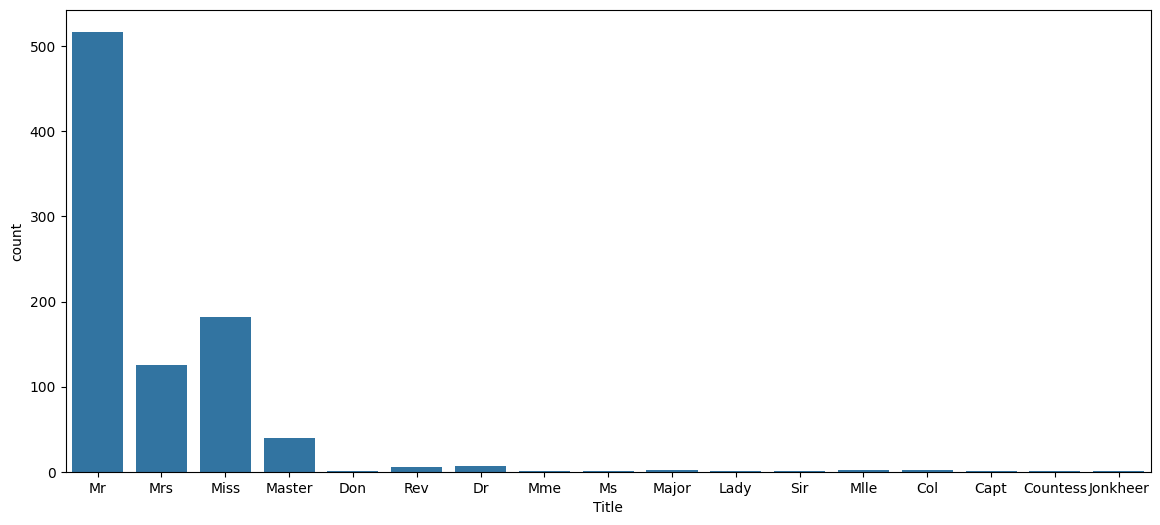

In [526]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.countplot(x='Title', data=data)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

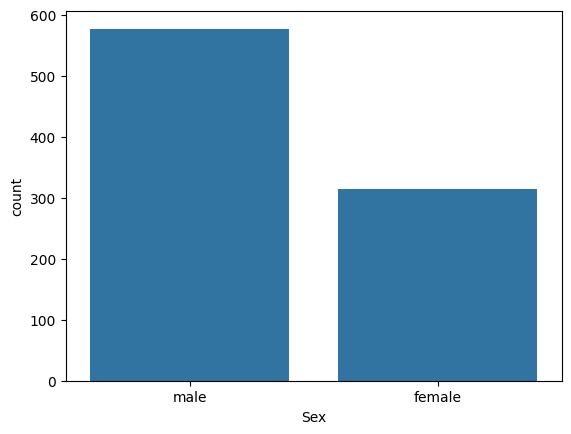

In [527]:
sns.countplot(x='Sex', data=data)

<Axes: xlabel='Survived', ylabel='count'>

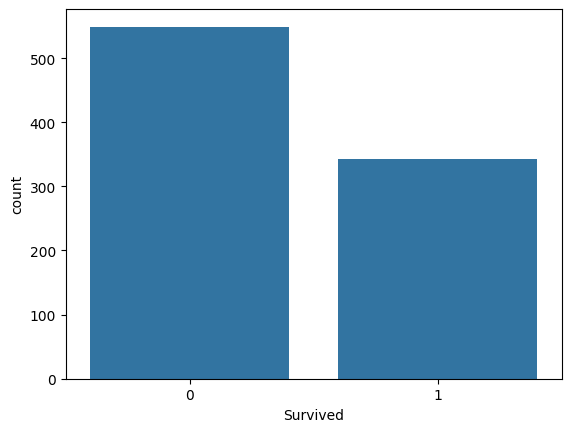

In [528]:
sns.countplot(x='Survived', data=data)

In [529]:
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [530]:
data['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [531]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77
Unknown,2


In [532]:
data['Title'] = data['Title'].replace({
    'Ms': 'Miss',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare'
})

data = data[data['Embarked'] != 'Unknown']

print(data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [533]:
from sklearn.preprocessing import LabelEncoder

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

data = pd.get_dummies(data, columns=['Title'])
data = pd.get_dummies(data, columns=['Embarked'])
data= data.astype(int)

data.head()


<ipython-input-533-c4695e1e2e65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22,1,0,7,0,0,1,0,0,0,0,1
1,2,1,1,1,38,1,0,71,0,0,0,1,0,1,0,0
2,3,1,3,1,26,0,0,7,0,1,0,0,0,0,0,1
3,4,1,1,1,35,1,0,53,0,0,0,1,0,0,0,1
4,5,0,3,0,35,0,0,8,0,0,1,0,0,0,0,1


# Splitting and Training

In [534]:
X = data.drop(['PassengerId', 'Survived'], axis=1)
y = data['Survived']

print(X.head())

   Pclass  Sex  Age  SibSp  Parch  Fare  Title_Master  Title_Miss  Title_Mr  \
0       3    0   22      1      0     7             0           0         1   
1       1    1   38      1      0    71             0           0         0   
2       3    1   26      0      0     7             0           1         0   
3       1    1   35      1      0    53             0           0         0   
4       3    0   35      0      0     8             0           0         1   

   Title_Mrs  Title_Rare  Embarked_C  Embarked_Q  Embarked_S  
0          0           0           0           0           1  
1          1           0           1           0           0  
2          0           0           0           0           1  
3          1           0           0           0           1  
4          0           0           0           0           1  


In [535]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [536]:
X.dtypes

,0
Pclass,int64
Sex,int64
Age,int64
SibSp,int64
Parch,int64
Fare,int64
Title_Master,int64
Title_Miss,int64
Title_Mr,int64
Title_Mrs,int64


In [537]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(X_train)
print(X_test)

       Pclass  Sex       Age     SibSp     Parch      Fare  Title_Master  \
315  0.819638    1 -0.279753 -0.482164 -0.477844 -0.509534             0   
801 -0.377319    1  0.097954  0.390819  0.728753 -0.117973             0   
805  0.819638    0  0.097954 -0.482164 -0.477844 -0.509534             0   
345 -0.377319    1 -0.430836 -0.482164 -0.477844 -0.385883             0   
49   0.819638    1 -0.884083  0.390819 -0.477844 -0.303450             0   
..        ...  ...       ...       ...       ...       ...           ...   
107  0.819638    0 -0.053129 -0.482164 -0.477844 -0.509534             0   
271  0.819638    0 -0.355294 -0.482164 -0.477844 -0.653794             0   
862 -1.574276    1  1.382156 -0.482164 -0.477844 -0.138582             0   
436  0.819638    1 -0.657459  1.263803  1.935349  0.046895             0   
103  0.819638    0  0.249036 -0.482164 -0.477844 -0.488926             0   

     Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Embarked_C  Embarked_Q  \
315        

# Using Logistic Regression and Ensemble Models

In [538]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

model = LogisticRegression(class_weight='balanced', max_iter=500)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.8283582089552238

Confusion Matrix:
 [[70 17]
 [ 6 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        87
           1       0.71      0.87      0.78        47

    accuracy                           0.83       134
   macro avg       0.81      0.84      0.82       134
weighted avg       0.85      0.83      0.83       134


ROC-AUC Score: 0.8777


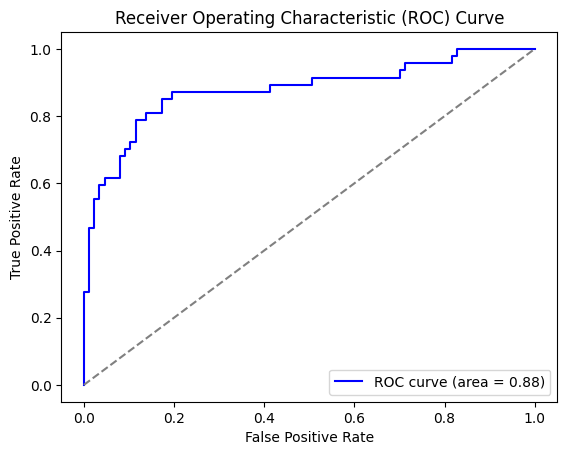

In [539]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [540]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

balance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]


model1 = LogisticRegression(class_weight='balanced')
model2 = RandomForestClassifier(class_weight='balanced')
model3 = XGBClassifier(scale_pos_weight=balance_ratio)

# Creating the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('xgb', model3)], voting='hard')
ensemble_model.fit(X_train, y_train)

# Predicting
y_test_pred = ensemble_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.8283582089552238

Confusion Matrix:
 [[70 17]
 [ 6 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        87
           1       0.71      0.87      0.78        47

    accuracy                           0.83       134
   macro avg       0.81      0.84      0.82       134
weighted avg       0.85      0.83      0.83       134


ROC-AUC Score: 0.8777


#Importing Test Data and Making prediction using our trained model

In [541]:
testdata = pd.read_csv("/content/kaggle/input/titanic_data/test.csv")
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [542]:
testdata.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [543]:
#Replacing Non-numerical NaN (object - datatype) values with 'unknown'
categorical_cols = testdata.select_dtypes(include=['object']).columns

for col in categorical_cols:
    testdata[col] = testdata[col].fillna("Unknown")


In [544]:
testdata['Title'] = testdata['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs


In [545]:
testdata.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
testdata.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


In [547]:
testdata['Title'] = testdata['Title'].replace({
    'Ms': 'Miss',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare'
})

testdata = testdata[testdata['Embarked'] != 'Unknown']

testdata = testdata.fillna(testdata.mean(numeric_only=True))

testdata= testdata.replace({'Sex': {'male': 0, 'female': 1}})
testdata = pd.get_dummies(testdata, columns=['Title'])
testdata = pd.get_dummies(testdata, columns=['Embarked'])
testdata = testdata.astype(int)
testdata.head()


<ipython-input-547-84cd65ec532a>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testdata= testdata.replace({'Sex': {'male': 0, 'female': 1}})


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34,0,0,7,0,0,1,0,0,0,1,0
1,893,3,1,47,1,0,7,0,0,0,1,0,0,0,1
2,894,2,0,62,0,0,9,0,0,1,0,0,0,1,0
3,895,3,0,27,0,0,8,0,0,1,0,0,0,0,1
4,896,3,1,22,1,1,12,0,0,0,1,0,0,0,1


In [548]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

scaler = StandardScaler()

testdata[numeric_cols] = scaler.fit_transform(testdata[numeric_cols])


print(testdata)

     PassengerId    Pclass  Sex       Age     SibSp     Parch      Fare  \
0            892  0.873482    0  0.301339 -0.499470 -0.400248 -0.505280   
1            893  0.873482    1  1.329905  0.616992 -0.400248 -0.505280   
2            894 -0.315819    0  2.516711 -0.499470 -0.400248 -0.469424   
3            895  0.873482    0 -0.252504 -0.499470 -0.400248 -0.487352   
4            896  0.873482    1 -0.648106  0.616992  0.619896 -0.415641   
..           ...       ...  ...       ...       ...       ...       ...   
413         1305  0.873482    0 -0.015143 -0.499470 -0.400248 -0.487352   
414         1306 -1.505120    1  0.696941 -0.499470 -0.400248  1.305424   
415         1307  0.873482    0  0.617821 -0.499470 -0.400248 -0.505280   
416         1308  0.873482    0 -0.015143 -0.499470 -0.400248 -0.487352   
417         1309  0.873482    0 -0.015143  0.616992  0.619896 -0.236363   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Embarked_C  \
0               0    

In [549]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X, y)
X_test_final = testdata.drop(columns=['PassengerId'])
X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

# Predict
y_test_pred = model.predict(X_test_final)

submission1 = pd.DataFrame({
    'PassengerId': testdata['PassengerId'],
    'Survived': y_test_pred
})

# submission.to_csv('/content/kaggle/input/titanic_data/titanic_predictions.csv', index=False)
print(submission1)

     PassengerId  Survived
0            892         1
1            893         1
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         1
414         1306         1
415         1307         1
416         1308         1
417         1309         1

[418 rows x 2 columns]


<Axes: xlabel='Survived', ylabel='count'>

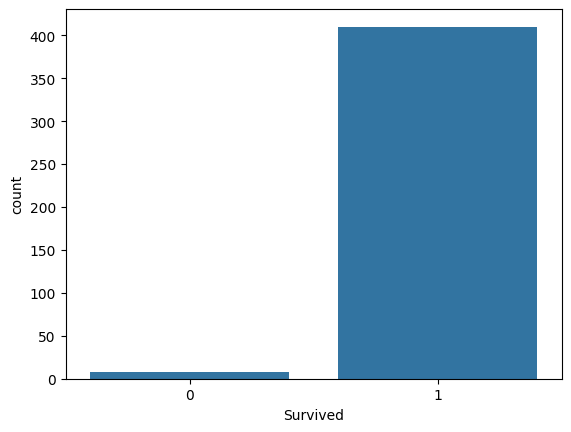

In [550]:
sns.countplot(x='Survived', data=submission1)

In [551]:
submission1['Survived'].value_counts()

,count
Survived,
1,410
0,8


In [552]:
model1 = LogisticRegression(class_weight='balanced')
model2 = RandomForestClassifier(class_weight='balanced')
model3 = XGBClassifier(scale_pos_weight=balance_ratio)

ensemble_model = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('xgb', model3)], voting='hard')
ensemble_model.fit(X_train, y_train)


y_test_pred = ensemble_model.predict(X_test_final)

submission = pd.DataFrame({
    'PassengerId': testdata['PassengerId'],
    'Survived': y_test_pred
})


submission.to_csv('/content/kaggle/input/titanic_data/titanic_predictions.csv', index=False)
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [553]:
submission['Survived'].value_counts()

,count
Survived,
0,261
1,157
